In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform


Using TensorFlow backend.


In [2]:

#FNDF = pd.read_csv("FakeNews2016.csv",names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","100","101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120","121","122","123","124","125","126","127","128","129","130","131","132","133","134","135","136","137","138","139","140","141","142","143","144","145","146","147","148","149","150","151","152","153","154","155","156","157","158","159","160","161","162","163","164","165","166","167","168","169","170","171","172","173","174","175","176","177","178","179","180","181","182","183","184","185","186","187","188","189","190","191","192","193","194","195","196","197","198","199","200","201","202","203","204","205"])
FNDF = pd.read_csv("FN20K.csv",names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","100","101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120","121","122","123","124","125","126","127","128","129","130","131","132","133","134","135","136","137","138","139","140","141","142","143","144","145","146","147","148","149","150","151","152","153","154","155","156","157","158","159","160","161","162","163","164","165","166","167","168","169","170","171","172","173","174","175","176","177","178","179","180","181","182","183","184","185","186","187","188","189","190","191","192","193","194","195","196","197","198","199","200","201","202","203","204","205"])

In [3]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [4]:
VTDF = pd.read_csv("ValidationTest.csv",names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","100","101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120","121","122","123","124","125","126","127","128","129","130","131","132","133","134","135","136","137","138","139","140","141","142","143","144","145","146","147","148","149","150","151","152","153","154","155","156","157","158","159","160","161","162","163","164","165","166","167","168","169","170","171","172","173","174","175","176","177","178","179","180","181","182","183","184","185","186","187","188","189","190","191","192","193","194","195","196","197","198","199","200","201","202","203","204","205"])

type(VTDF)

pandas.core.frame.DataFrame

In [5]:
FNDF.head(1000)


,1,2,3,4,5,6,7,8,9,10,...,196,197,198,199,200,201,202,203,204,205
0,0.076686,0.47,0.000,1.754000,0.000,5.264000,0.000,1.404000,0.00,1.404000,...,0,0,0,0,0,0,0,0,0,0
1,0.232759,1.53,0.000,0.000000,0.000,7.142500,0.000,2.677500,0.00,5.357500,...,0,0,0,0,0,0,0,0,0,0
2,0.273462,1.91,0.000,0.000000,0.000,9.090000,0.000,9.090000,0.00,6.060000,...,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.00,3.845,0.640833,23.075,3.845833,1.925,0.320833,7.69,1.281667,...,0,0,0,0,0,0,0,0,1,1
4,0.345626,2.40,0.000,2.381667,0.000,3.571667,0.000,3.571667,0.00,0.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.328579,2.08,6.250,0.892857,26.040,3.720000,17.710,2.530000,5.21,0.744286,...,0,0,0,0,0,0,0,0,0,1
996,0.321400,2.18,0.000,0.512000,0.000,12.820000,0.000,2.564000,0.00,1.026000,...,0,0,0,0,0,0,0,0,1,1
997,0.240695,1.79,0.000,0.000000,0.000,20.000000,0.000,6.665000,0.00,6.665000,...,0,0,0,0,0,0,0,0,0,0
998,0.394785,2.60,0.000,0.000000,0.000,14.285000,0.000,21.430000,0.00,7.145000,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y=FNDF['205'].values 
Y
YVal=VTDF['205'].values 

In [7]:
X = FNDF.drop(['205'],axis=1).values
XVal = VTDF.drop(['205'],axis=1).values

In [8]:
FNDF.describe()

,1,2,3,4,5,6,7,8,9,10,...,196,197,198,199,200,201,202,203,204,205
count,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,...,19352.000000,19352.0,19352.0,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000
mean,0.227815,1.544573,1.326454,1.483890,7.525167,9.088713,2.956507,3.652027,1.938141,2.402797,...,0.216722,0.0,0.0,0.000775,0.024855,0.001033,0.030126,0.001809,0.163084,0.492972
std,0.186296,1.288271,4.458810,3.852397,16.317571,8.715473,7.365180,5.122749,5.980333,4.497048,...,0.639309,0.0,0.0,0.034467,0.345134,0.047673,0.386817,0.055188,0.604759,0.499964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.105220,0.700000,0.000000,0.000000,0.000000,5.116857,0.000000,1.418036,0.000000,0.308750,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.203405,1.370000,0.000000,0.764375,0.000000,7.500000,0.000000,2.722000,0.000000,1.450000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.319053,2.170000,0.000000,1.754000,0.000000,10.715000,0.000000,4.430500,0.000000,2.857143,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.882353,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,25.000000,0.0,0.0,3.000000,20.000000,4.000000,25.000000,3.000000,20.000000,1.000000


In [9]:
len(XVal)

20

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=1)

In [11]:
X_train

array([[0.05394111, 0.33      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22803763, 1.68      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6615208 , 4.35      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22635984, 1.56      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2563252 , 1.83      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1523616 , 1.09      , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
XVal


array([[0.158715, 1.16    , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.317668, 2.27    , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.265749, 1.85    , 0.      , ..., 0.      , 0.      , 1.      ],
       ...,
       [0.239696, 1.39    , 0.      , ..., 0.      , 0.      , 1.      ],
       [0.093525, 0.56    , 9.23    , ..., 0.      , 0.      , 0.      ],
       [0.230078, 1.55    , 0.      , ..., 0.      , 0.      , 0.      ]])

In [13]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
YVal= le.transform(YVal)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
XVal = ss.transform(XVal)



y_train.shape


(16449,)

In [14]:
XVal.mean()


-0.023579097218833965

In [15]:
XVal.std()

0.6860458548887008

In [16]:
X_test.std()

1.0423801831862345

In [17]:
from keras.layers import LeakyReLU
from keras import optimizers

In [18]:
#sgd = optimizers.SGD(momentum=0.9, nesterov=True, decay=1e-6, lr=0.01
adamax=optimizers.Adamax()

In [19]:
from keras.regularizers import l1_l2
from keras.regularizers import l2
from keras.layers import Dropout

In [20]:
model = Sequential()
#model.add(Dense(100, input_dim=X_train.shape[1]))
model.add(Dense(100, input_dim=X_train.shape[1], kernel_regularizer=l1_l2(l1=0.007, l2=0.005)))
model.add(LeakyReLU(alpha=0.001))
#model.add(Dropout(0.3)) 
model.add(Dense(60,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001))
model.add(Dense(60,  activation="tanh",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001))
model.add(Dropout(0.3)) 
model.add(Dense(30,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001)) 
#model.add(Dropout(0.3)) 
model.add(Dense(15,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001)) 
#model.add(Dropout(0.3)) 
model.add(Dense(7,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001)) 
#model.add(Dense(3, activation="softmax"))
#model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               20500     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)               

In [22]:
from keras.callbacks import History
history= History()
from time import time
start_at = time ()
model.fit(X_train, y_train, epochs=100, batch_size=512, callbacks=[history])
exec_time = time()-start_at

Epoch 1/100
16449/16449 [==============================] - 1s 33us/step - loss: 10.5230 - accuracy: 0.6056
Epoch 2/100
16449/16449 [==============================] - 0s 13us/step - loss: 6.2270 - accuracy: 0.7652
Epoch 3/100
16449/16449 [==============================] - 0s 14us/step - loss: 3.2651 - accuracy: 0.8311
Epoch 4/100
16449/16449 [==============================] - 0s 13us/step - loss: 1.5417 - accuracy: 0.8456
Epoch 5/100
16449/16449 [==============================] - 0s 12us/step - loss: 0.8848 - accuracy: 0.8484
Epoch 6/100
16449/16449 [==============================] - 0s 12us/step - loss: 0.7068 - accuracy: 0.8577
Epoch 7/100
16449/16449 [==============================] - 0s 14us/step - loss: 0.6219 - accuracy: 0.8653
Epoch 8/100
16449/16449 [==============================] - 0s 11us/step - loss: 0.5644 - accuracy: 0.8712
Epoch 9/100
16449/16449 [==============================] - 0s 12us/step - loss: 0.5392 - accuracy: 0.8741
Epoch 10/100
16449/16449 [===================

16449/16449 [==============================] - 0s 12us/step - loss: 0.3823 - accuracy: 0.8987
Epoch 77/100
16449/16449 [==============================] - 0s 11us/step - loss: 0.3848 - accuracy: 0.8987
Epoch 78/100
16449/16449 [==============================] - 0s 11us/step - loss: 0.3825 - accuracy: 0.8988
Epoch 79/100
16449/16449 [==============================] - 0s 12us/step - loss: 0.3847 - accuracy: 0.8986
Epoch 80/100
16449/16449 [==============================] - 0s 11us/step - loss: 0.3804 - accuracy: 0.8993
Epoch 81/100
16449/16449 [==============================] - 0s 11us/step - loss: 0.3748 - accuracy: 0.9038
Epoch 82/100
16449/16449 [==============================] - 0s 10us/step - loss: 0.3791 - accuracy: 0.8999
Epoch 83/100
16449/16449 [==============================] - 0s 10us/step - loss: 0.3779 - accuracy: 0.8999
Epoch 84/100
16449/16449 [==============================] - 0s 11us/step - loss: 0.3834 - accuracy: 0.8973
Epoch 85/100
16449/16449 [========================

Tempo di addestramento: 0 minuti e 22 secondi
2903/2903 [==============================] - 0s 52us/step


[0.3829356251484026, 0.8952807188034058]

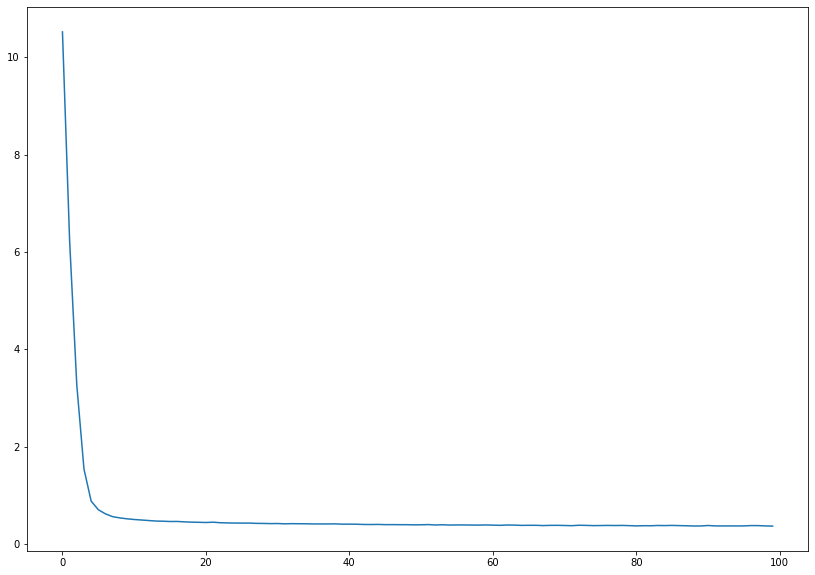

In [23]:
print("Tempo di addestramento: %d minuti e %d secondi" % (exec_time/60, exec_time%60))
plt.figure(figsize=(14,10))
plt.plot(history.history['loss'])
model.evaluate (X_test,y_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
y_pred_test = model.predict_classes(X_test)
cm= confusion_matrix(y_test, y_pred_test)


In [26]:
cm

array([[1338,  127],
       [ 177, 1261]], dtype=int64)

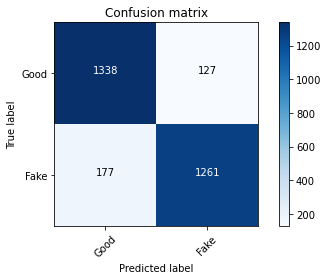

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def showBounds(X,Y,model, labels=["classe negativa", "classe positiva"]):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()





plot_confusion_matrix(cm,['Good','Fake'])




In [28]:
model.evaluate (X_test,y_test)

2903/2903 [==============================] - 0s 35us/step


[0.3829356251484026, 0.8952807188034058]

In [29]:
y_pred_Val = model.predict_classes(XVal)
YVal_prob= model.predict_proba(XVal)
for i in range(0,len(XVal)):
   # if(y_test[i]!=y_pred[i]):
        print("%d)Etichettato come %d classificato come %d prob %d" %  (i+1,YVal[i], y_pred_Val[i], YVal_prob[i]))

1)Etichettato come 1 classificato come 1 prob 0
2)Etichettato come 1 classificato come 1 prob 0
3)Etichettato come 1 classificato come 0 prob 0
4)Etichettato come 1 classificato come 1 prob 0
5)Etichettato come 1 classificato come 1 prob 0
6)Etichettato come 1 classificato come 1 prob 0
7)Etichettato come 1 classificato come 1 prob 0
8)Etichettato come 1 classificato come 1 prob 0
9)Etichettato come 1 classificato come 1 prob 0
10)Etichettato come 1 classificato come 1 prob 0
11)Etichettato come 0 classificato come 1 prob 0
12)Etichettato come 0 classificato come 1 prob 0
13)Etichettato come 0 classificato come 1 prob 0
14)Etichettato come 0 classificato come 1 prob 0
15)Etichettato come 0 classificato come 1 prob 0
16)Etichettato come 0 classificato come 1 prob 0
17)Etichettato come 0 classificato come 1 prob 0
18)Etichettato come 0 classificato come 1 prob 0
19)Etichettato come 0 classificato come 0 prob 0
20)Etichettato come 0 classificato come 1 prob 0


In [30]:
model.evaluate (XVal,YVal)

20/20 [==============================] - 0s 100us/step


[1.7486298084259033, 0.5]